In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

#### In this dataset there are 50000 training set image

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1)

In [10]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### See the image now

In [11]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

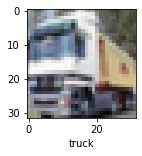

In [13]:
plot_sample(x_train, y_train, 1)

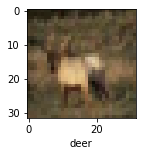

In [15]:
plot_sample(x_train, y_train, 3)

In [16]:
x_train = x_train/255
x_test = x_test/255

In [18]:
### Model ANN(Artificial Neural Network)

ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
    
])
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 127s 76ms/step - loss: 1.9305 - accuracy: 0.3052
Epoch 2/20
1563/1563 [==============================] - 98s 62ms/step - loss: 1.6312 - accuracy: 0.4270
Epoch 3/20
1563/1563 [==============================] - 99s 63ms/step - loss: 1.5542 - accuracy: 0.4566
Epoch 4/20
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4804 - accuracy: 0.4764
Epoch 5/20
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4296 - accuracy: 0.4934
Epoch 6/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3969 - accuracy: 0.5098
Epoch 7/20
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3538 - accuracy: 0.5245
Epoch 8/20
1563/1563 [==============================] - 108s 69ms/step - loss: 1.3212 - accuracy: 0.5335
Epoch 9/20
1563/1563 [==============================] - 107s 69ms/step - loss: 1.2808 - accuracy: 0.5527
Epoch 10/20
1563/1563 [==============================] - 10

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_predict = ann.predict(x_test)
y_predict_class = [np.argmax(element) for element in y_predict]
print('Classification Report:', classification_report(y_test, y_predict_class))

Classification Report:               precision    recall  f1-score   support

           0       0.58      0.69      0.63      1000
           1       0.54      0.81      0.65      1000
           2       0.51      0.34      0.41      1000
           3       0.43      0.30      0.36      1000
           4       0.45      0.51      0.48      1000
           5       0.51      0.38      0.44      1000
           6       0.65      0.56      0.60      1000
           7       0.45      0.76      0.57      1000
           8       0.71      0.63      0.67      1000
           9       0.69      0.43      0.53      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.53     10000
weighted avg       0.55      0.54      0.53     10000



In [21]:
### Now apply CNN(Convolution Neural Network)
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(10, activation = 'softmax')
])
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [22]:
cnn.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 35s 19ms/step - loss: 1.7324 - accuracy: 0.3730
Epoch 2/20
1563/1563 [==============================] - 37s 23ms/step - loss: 1.2110 - accuracy: 0.5745
Epoch 3/20
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0571 - accuracy: 0.6330
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9736 - accuracy: 0.6652
Epoch 5/20
1563/1563 [==============================] - 34s 21ms/step - loss: 0.8965 - accuracy: 0.6914
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8537 - accuracy: 0.7054
Epoch 7/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8009 - accuracy: 0.7237
Epoch 8/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7757 - accuracy: 0.7332
Epoch 9/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7490 - accuracy: 0.7428
Epoch 10/20
1563/1563 [==============================] - 41s 26m

#### With CNN, at the end 5 epochs, accuracy was at around 80.52% which is a significant improvement over ANN. 

In [23]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 8ms/step - loss: 0.9312 - accuracy: 0.6994


[0.9311569333076477, 0.699400007724762]

In [24]:
y_pred = cnn.predict(x_test)

In [25]:
y_pred[:5]

array([[2.01565796e-03, 4.64192308e-05, 1.05909444e-03, 5.11736751e-01,
        1.61564094e-05, 1.40639460e-02, 2.17016172e-02, 5.38870117e-05,
        4.49139744e-01, 1.66701982e-04],
       [3.00113042e-03, 2.19201267e-01, 5.26525628e-06, 1.18889645e-07,
        1.09794360e-08, 1.07595144e-09, 1.04936095e-08, 1.17108003e-08,
        7.77227879e-01, 5.64336544e-04],
       [6.41692802e-02, 2.16967553e-01, 1.36505079e-03, 3.13313236e-03,
        3.67603119e-04, 2.13589941e-04, 1.87691170e-04, 2.22413591e-03,
        5.15924692e-01, 1.95447296e-01],
       [9.59971666e-01, 5.94089506e-03, 2.02180748e-03, 1.58499271e-04,
        2.39581964e-03, 3.81736669e-07, 2.53213366e-05, 1.66619476e-03,
        2.75906716e-02, 2.28737961e-04],
       [3.89622937e-06, 9.54118968e-06, 1.20929815e-01, 1.01750173e-01,
        2.86928624e-01, 7.93044269e-03, 4.82295066e-01, 7.47099557e-06,
        1.44717269e-04, 2.56179135e-07]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

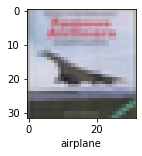

In [29]:
plot_sample(x_test, y_test, 3)

In [30]:
classes[y_classes[3]]

'airplane'